# COMP 641: EDA for Group Project (LAUSD Edulytix)
## Member: Diego Arteaga

In [1]:
import pandas as pd

# CSUN - FALL 2025 - COMP 641 GROUP 2
#-----------------------------------------------------------------------------------------#
# 2023–24 Los Angeles Unified Districtwide research file (CAASPP for Los Angeles County in LAUSD)
# Sourced: https://caaspp-elpac.ets.org/caaspp/ResearchFileListSB?ps=true&lstTestYear=2024&lstTestType=B&lstCounty=00&lstDistrict=00000
# File: https://caaspp-elpac.ets.org/caaspp/researchfiles/sb_ca2024_all_19_64733_csv_v1.zip
# File Format:
#              - student group IDs and names - https://caaspp-elpac.ets.org/caaspp/researchfiles/StudentGroups.zip
#              - Research Files Record Definitions page - https://caaspp-elpac.ets.org/caaspp/ResearchFileFormatSB?ps=true&lstTestYear=2024&lstTestType=B
#              - Entity Files - https://caaspp-elpac.ets.org/caaspp/researchfiles/sb_ca2024entities_csv.zip
#              - California County Codes - https://notary.cdn.sos.ca.gov/forms/notary-county-codes.pdf
#-----------------------------------------------------------------------------------------#
# Annual County Resident Population Estimates by Age, Sex, Race, and Hispanic Origin: April 1, 2020 to July 1, 2024 (CC-EST2024-ALLDATA)
# (Only California)
# Sourced: https://www.census.gov/data/datasets/time-series/demo/popest/2020s-counties-detail.html
# File Layout: https://www2.census.gov/programs-surveys/popest/technical-documentation/file-layouts/2020-2024/CC-EST2024-ALLDATA.pdf
# County FIPS Codes: https://transition.fcc.gov/oet/info/maps/census/fips/fips.txt (06000 is the start for California County codes)
# File: https://www2.census.gov/programs-surveys/popest/datasets/2020-2024/counties/asrh/cc-est2024-alldata-06.csv
#-----------------------------------------------------------------------------------------#

In [2]:
import re
import pandas as pd

# For CAASPP, read as strings first; treat common suppression tokens as NA.
# Look at census data after
URL = "https://caaspp-elpac.ets.org/caaspp/researchfiles/sb_ca2024_all_19_64733_csv_v1.zip"
df = pd.read_csv(
    URL,
    sep="^",
    dtype="string",
    na_values=["", " ", "NA", "N/A", "*", "--"]
)

# try direct read from census server
import pandas as pd
URL = "https://www2.census.gov/programs-surveys/popest/datasets/2020-2024/counties/asrh/cc-est2024-alldata-06.csv"
df2 = pd.read_csv(URL)
print(df2.shape)
df2.head()


(6612, 80)


,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,...,HWAC_MALE,HWAC_FEMALE,HBAC_MALE,HBAC_FEMALE,HIAC_MALE,HIAC_FEMALE,HAAC_MALE,HAAC_FEMALE,HNAC_MALE,HNAC_FEMALE
0,50,6,1,California,Alameda County,1,0,1682296,834834,847462,...,175792,170152,11316,11756,13489,12968,10195,10355,2541,2614
1,50,6,1,California,Alameda County,1,1,93204,47631,45573,...,12501,12012,1187,1120,966,936,1248,1173,300,269
2,50,6,1,California,Alameda County,1,2,95095,48764,46331,...,13214,12692,1074,1023,867,898,1126,1117,247,244
3,50,6,1,California,Alameda County,1,3,98085,50437,47648,...,14923,14154,1331,1293,1161,981,1254,1137,321,309
4,50,6,1,California,Alameda County,1,4,97815,49258,48557,...,13913,13897,1040,1069,989,997,967,967,243,226


In [3]:
# Set to show all rows
pd.set_option('display.max_rows', None)

# Preview data
display(df.head())
display(df.tail())

# Inspect structure
df.shape

# Check info
df.info()

,County Code,District Code,District Name,School Code,School Name,Type ID,Filler,Test Year,Test Type,Test ID,...,Composite Area 1 Percentage Below Standard,Composite Area 1 Count Below Standard,Composite Area 1 Total,Composite Area 2 Percentage Above Standard,Composite Area 2 Count Above Standard,Composite Area 2 Percentage Near Standard,Composite Area 2 Count Near Standard,Composite Area 2 Percentage Below Standard,Composite Area 2 Count Below Standard,Composite Area 2 Total
0,19,64733,Los Angeles Unified,0000000,<NA>,6,<NA>,2024,B,1,...,31.36,9779,31185,20.80,6488,42.70,13316,36.50,11381,31185
1,19,64733,Los Angeles Unified,0000000,<NA>,6,<NA>,2024,B,1,...,33.77,5418,16043,18.84,3022,41.42,6645,39.74,6376,16043
2,19,64733,Los Angeles Unified,0000000,<NA>,6,<NA>,2024,B,1,...,28.80,4361,15142,22.89,3466,44.06,6671,33.05,5005,15142
3,19,64733,Los Angeles Unified,0000000,<NA>,6,<NA>,2024,B,1,...,23.25,5417,23296,26.40,6149,45.64,10633,27.96,6514,23296
4,19,64733,Los Angeles Unified,0000000,<NA>,6,<NA>,2024,B,1,...,14.47,305,2108,32.78,691,47.58,1003,19.64,414,2108


,County Code,District Code,District Name,School Code,School Name,Type ID,Filler,Test Year,Test Type,Test ID,...,Composite Area 1 Percentage Below Standard,Composite Area 1 Count Below Standard,Composite Area 1 Total,Composite Area 2 Percentage Above Standard,Composite Area 2 Count Above Standard,Composite Area 2 Percentage Near Standard,Composite Area 2 Count Near Standard,Composite Area 2 Percentage Below Standard,Composite Area 2 Count Below Standard,Composite Area 2 Total
231168,19,64733,Los Angeles Unified,6120810,MacArthur Park Elementary School for the Visua...,7,<NA>,2024,B,2,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
231169,19,64733,Los Angeles Unified,6120810,MacArthur Park Elementary School for the Visua...,7,<NA>,2024,B,2,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
231170,19,64733,Los Angeles Unified,6120810,MacArthur Park Elementary School for the Visua...,7,<NA>,2024,B,2,...,50.57,89,176,13.64,24,28.98,51,57.39,101,176
231171,19,64733,Los Angeles Unified,6120810,MacArthur Park Elementary School for the Visua...,7,<NA>,2024,B,2,...,63.27,31,49,8.16,4,18.37,9,73.47,36,49
231172,19,64733,Los Angeles Unified,6120810,MacArthur Park Elementary School for the Visua...,7,<NA>,2024,B,2,...,48.15,13,27,29.63,8,29.63,8,40.74,11,27


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231173 entries, 0 to 231172
Data columns (total 69 columns):
 #   Column                                      Non-Null Count   Dtype 
---  ------                                      --------------   ----- 
 0   County Code                                 231173 non-null  string
 1   District Code                               231173 non-null  string
 2   District Name                               231173 non-null  string
 3   School Code                                 231173 non-null  string
 4   School Name                                 230283 non-null  string
 5   Type ID                                     231173 non-null  string
 6   Filler                                      0 non-null       string
 7   Test Year                                   231173 non-null  string
 8   Test Type                                   231173 non-null  string
 9   Test ID                                     231173 non-null  string
 10  Student 

In [4]:
# Check for null values
df.isnull().sum()

,0
County Code,0
District Code,0
District Name,0
School Code,0
School Name,890
Type ID,0
Filler,231173
Test Year,0
Test Type,0
Test ID,0


In [5]:
# Check for duplicates
df.duplicated().sum()

np.int64(0)

In [6]:
# Clean data
# May want to drop rows with null values
# There may be at least one null value in each row unfortunately

# Filling may alter data in a dishonest way
# (Ex. test scores are intentionally null if a student group was composed of less than 11 people
# therefore there are no scores, and shouldn't be counted against that student group)


# This trims unusable columns (including a fully empty Filler)
# coerces likely metric fields (pct/mean/num/tested/scale/score) to numeric and removes only those rows where all metrics are missing
# That preserves rows with partially suppressed values (e.g., groups < 11) without “filling” NAs


# Drop columns that are entirely empty (including any 'Filler'-type columns).
empty_cols = df.columns[df.isna().all()]
df = df.drop(columns=empty_cols)

# Drop Filler column because there are 0 non-null values
if "Filler" in df.columns:
    df = df.drop(columns=["Filler"])

# Identify metric columns (pct/mean/num/etc.), then coerce to numeric.
metric_cols = [c for c in df.columns
               if re.match(r"(?i)^(pct|percent|mean|avg|num|number|students|tested|scale|score)", c)]
df[metric_cols] = df[metric_cols].apply(pd.to_numeric, errors="coerce")

# 4) Instead of dropping rows with ANY NA, keep rows that have at least one metric present.
#    This preserves rows where some metrics are suppressed but others are available.
df = df.dropna(subset=metric_cols, how="all")

df.info()
df.describe()
df.tail()


<class 'pandas.core.frame.DataFrame'>
Index: 134213 entries, 0 to 231172
Data columns (total 68 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   County Code                                 134213 non-null  string 
 1   District Code                               134213 non-null  string 
 2   District Name                               134213 non-null  string 
 3   School Code                                 134213 non-null  string 
 4   School Name                                 133355 non-null  string 
 5   Type ID                                     134213 non-null  string 
 6   Test Year                                   134213 non-null  string 
 7   Test Type                                   134213 non-null  string 
 8   Test ID                                     134213 non-null  string 
 9   Student Group ID                            134213 non-null  string 
 10  G

,County Code,District Code,District Name,School Code,School Name,Type ID,Test Year,Test Type,Test ID,Student Group ID,...,Composite Area 1 Percentage Below Standard,Composite Area 1 Count Below Standard,Composite Area 1 Total,Composite Area 2 Percentage Above Standard,Composite Area 2 Count Above Standard,Composite Area 2 Percentage Near Standard,Composite Area 2 Count Near Standard,Composite Area 2 Percentage Below Standard,Composite Area 2 Count Below Standard,Composite Area 2 Total
231162,19,64733,Los Angeles Unified,6120810,MacArthur Park Elementary School for the Visua...,7,2024,B,2,180,...,57.14,12,21,19.05,4,33.33,7,47.62,10,21
231166,19,64733,Los Angeles Unified,6120810,MacArthur Park Elementary School for the Visua...,7,2024,B,2,204,...,49.69,79,159,12.58,20,29.56,47,57.86,92,159
231170,19,64733,Los Angeles Unified,6120810,MacArthur Park Elementary School for the Visua...,7,2024,B,2,241,...,50.57,89,176,13.64,24,28.98,51,57.39,101,176
231171,19,64733,Los Angeles Unified,6120810,MacArthur Park Elementary School for the Visua...,7,2024,B,2,251,...,63.27,31,49,8.16,4,18.37,9,73.47,36,49
231172,19,64733,Los Angeles Unified,6120810,MacArthur Park Elementary School for the Visua...,7,2024,B,2,252,...,48.15,13,27,29.63,8,29.63,8,40.74,11,27


In [7]:
# Separate Test ID 1 (ELA) into a new DataFrame
df_ela = df[df['Test ID'] == '1'].copy()  # Ensure 'Test ID' is treated as a string

# Separate Test ID 2 (Math) into a new DataFrame
df_math = df[df['Test ID'] == '2'].copy()

# Verify the separation
print("ELA DataFrame shape:", df_ela.shape)
print("Math DataFrame shape:", df_math.shape)

# Optional: Check the first few rows of each DataFrame
print("\nSample rows for ELA:")
display(df_ela.head())

print("\nSample rows for Math:")
display(df_math.head())

ELA DataFrame shape: (66782, 68)
Math DataFrame shape: (67431, 68)

Sample rows for ELA:


,County Code,District Code,District Name,School Code,School Name,Type ID,Test Year,Test Type,Test ID,Student Group ID,...,Composite Area 1 Percentage Below Standard,Composite Area 1 Count Below Standard,Composite Area 1 Total,Composite Area 2 Percentage Above Standard,Composite Area 2 Count Above Standard,Composite Area 2 Percentage Near Standard,Composite Area 2 Count Near Standard,Composite Area 2 Percentage Below Standard,Composite Area 2 Count Below Standard,Composite Area 2 Total
0,19,64733,Los Angeles Unified,0000000,<NA>,6,2024,B,1,1,...,31.36,9779,31185,20.80,6488,42.70,13316,36.50,11381,31185
1,19,64733,Los Angeles Unified,0000000,<NA>,6,2024,B,1,3,...,33.77,5418,16043,18.84,3022,41.42,6645,39.74,6376,16043
2,19,64733,Los Angeles Unified,0000000,<NA>,6,2024,B,1,4,...,28.80,4361,15142,22.89,3466,44.06,6671,33.05,5005,15142
3,19,64733,Los Angeles Unified,0000000,<NA>,6,2024,B,1,6,...,23.25,5417,23296,26.40,6149,45.64,10633,27.96,6514,23296
4,19,64733,Los Angeles Unified,0000000,<NA>,6,2024,B,1,7,...,14.47,305,2108,32.78,691,47.58,1003,19.64,414,2108



Sample rows for Math:


,County Code,District Code,District Name,School Code,School Name,Type ID,Test Year,Test Type,Test ID,Student Group ID,...,Composite Area 1 Percentage Below Standard,Composite Area 1 Count Below Standard,Composite Area 1 Total,Composite Area 2 Percentage Above Standard,Composite Area 2 Count Above Standard,Composite Area 2 Percentage Near Standard,Composite Area 2 Count Near Standard,Composite Area 2 Percentage Below Standard,Composite Area 2 Count Below Standard,Composite Area 2 Total
445,19,64733,Los Angeles Unified,0000000,<NA>,6,2024,B,2,1,...,30.10,9606,31913,27.01,8620,35.27,11257,37.72,12037,31914
446,19,64733,Los Angeles Unified,0000000,<NA>,6,2024,B,2,3,...,28.83,4735,16426,28.79,4729,35.08,5763,36.13,5935,16427
447,19,64733,Los Angeles Unified,0000000,<NA>,6,2024,B,2,4,...,31.45,4871,15487,25.12,3891,35.47,5494,39.40,6102,15487
448,19,64733,Los Angeles Unified,0000000,<NA>,6,2024,B,2,6,...,23.12,5381,23279,34.07,7932,37.15,8648,28.78,6700,23280
449,19,64733,Los Angeles Unified,0000000,<NA>,6,2024,B,2,7,...,15.62,329,2106,42.21,889,39.08,823,18.71,394,2106


In [8]:
# Count unique school codes in df_ela
if 'School Code' in df_ela.columns:
    unique_ela_schools = df_ela['School Code'].nunique()
    print(f"Number of unique school codes in ELA (df_ela): {unique_ela_schools}")
else:
    print("'School Code' column not found in df_ela.")

# Count unique school codes in df_math
if 'School Code' in df_math.columns:
    unique_math_schools = df_math['School Code'].nunique()
    print(f"Number of unique school codes in Math (df_math): {unique_math_schools}")
else:
    print("'School Code' column not found in df_math.")

Number of unique school codes in ELA (df_ela): 748
Number of unique school codes in Math (df_math): 748


In [10]:
# Check if 'School Name' exists in the dataframe
if 'School Name' in df.columns:
    # Get all unique school names
    unique_school_names = df['School Name'].dropna().unique()
    print(f"Number of unique school names: {len(unique_school_names)}")
    print("\nSample of unique school names:")
    # View slice of data to double check
    print(unique_school_names[:40])
else:
    print("'School Name' column not found in the DataFrame.")

Number of unique school names: 747

Sample of unique school names:
<StringArray>
[                 'William J. Johnston Community Day',
                     'Richard Riordan Primary Center',
       'Dr. Theodore T. Alexander Jr. Science Center',
                    'Richard A. Alonzo Community Day',
                                'Middle College High',
 'Dr. Richard A. Vladovic Harbor Teacher Preparation',
                              'Bellingham Elementary',
                           'Charles White Elementary',
                                 'Harmony Elementary',
                                       'Vista Middle',
                                   'Southeast Middle',
                               'Orthopaedic Hospital',
                            'Northridge Academy High',
 'International Studies Learning Center at Legacy Hi',
                               'Hollywood Elementary',
                                 'Harvard Elementary',
                                  'Paci

In [11]:
# Ensure the columns are numeric
df['Total Students Tested'] = pd.to_numeric(df['Total Students Tested'], errors='coerce')
df['Total Students Enrolled'] = pd.to_numeric(df['Total Students Enrolled'], errors='coerce')

# Calculate participation rate
df['Participation Rate (%)'] = (df['Total Students Tested'] / df['Total Students Enrolled']) * 100

# Ensure the column was created successfully
print("Participation Rate column created. Sample values:")
print(df[['Total Students Tested', 'Total Students Enrolled', 'Participation Rate (%)']].head())

Participation Rate column created. Sample values:
   Total Students Tested  Total Students Enrolled  Participation Rate (%)
0                  31190                    32287               96.602348
1                  16045                    16642               96.412691
2                  15145                    15645               96.804091
3                  23300                    23538               98.988869
4                   2108                     2113                99.76337


# EDA: Participation Rate
## This one seemed kinda interesting, but might not be too relevant

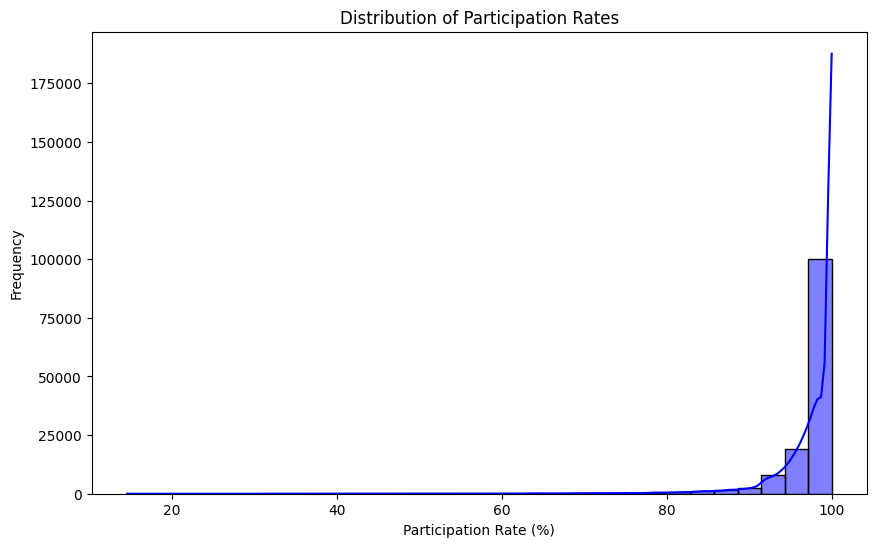

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting Distribution of Participation Rates (# of students tested/enrolled)
plt.figure(figsize=(10, 6))
sns.histplot(df['Participation Rate (%)'], bins=30, kde=True, color='blue')
plt.title('Distribution of Participation Rates')
plt.xlabel('Participation Rate (%)')
plt.ylabel('Frequency')
plt.show()

# Participation Rate Distribution
## Based on the visible patterns, this one seems more insightful

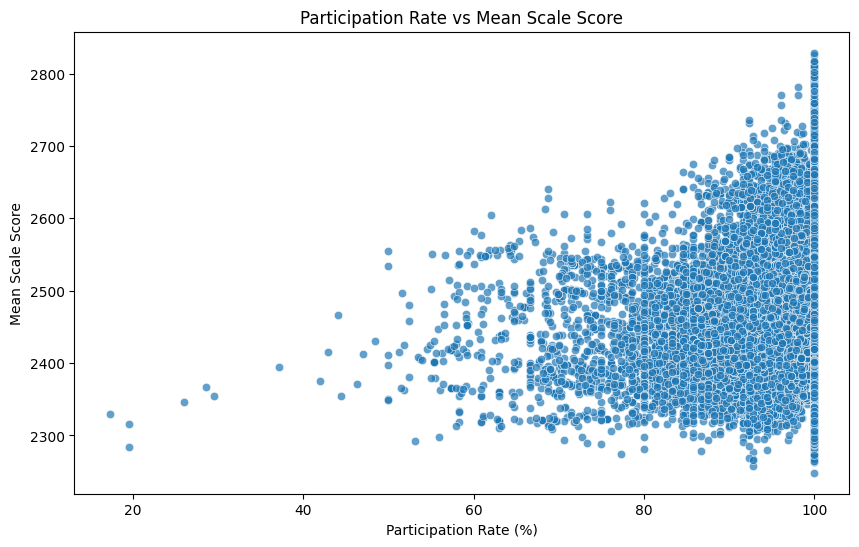

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Participation Rate (%)', y='Mean Scale Score', alpha=0.7)
plt.title('Participation Rate vs Mean Scale Score')
plt.xlabel('Participation Rate (%)')
plt.ylabel('Mean Scale Score')
plt.show()

In [15]:
# Aggregate mean scores per school for ELA
ela_school_scores = df_ela.groupby('School Name')['Mean Scale Score'].mean().reset_index()
ela_school_scores.rename(columns={'Mean Scale Score': 'ELA Mean Scale Score'}, inplace=True)

# Aggregate mean scores per school for Math
math_school_scores = df_math.groupby('School Name')['Mean Scale Score'].mean().reset_index()
math_school_scores.rename(columns={'Mean Scale Score': 'Math Mean Scale Score'}, inplace=True)

# Verify the aggregated scores
print("ELA School Scores Sample:")
print(ela_school_scores.head())

print("\nMath School Scores Sample:")
print(math_school_scores.head())

ELA School Scores Sample:
                                         School Name  ELA Mean Scale Score
0                        Abraham Lincoln Senior High           2614.317241
1  Academies of Education and Empowerment at Cars...           2604.931034
2                      Academy for Enriched Sciences           2508.753704
3             Academy of Medical Arts at Carson High              2627.924
4                           Albion Street Elementary           2442.608511

Math School Scores Sample:
                                         School Name  Math Mean Scale Score
0                        Abraham Lincoln Senior High            2599.362069
1  Academies of Education and Empowerment at Cars...            2507.048276
2                      Academy for Enriched Sciences            2537.294444
3             Academy of Medical Arts at Carson High               2562.212
4                           Albion Street Elementary            2432.621277


# Distribution of Scores per Test (Math and ELA)
## Keeping this one, skewness is visible for both tests

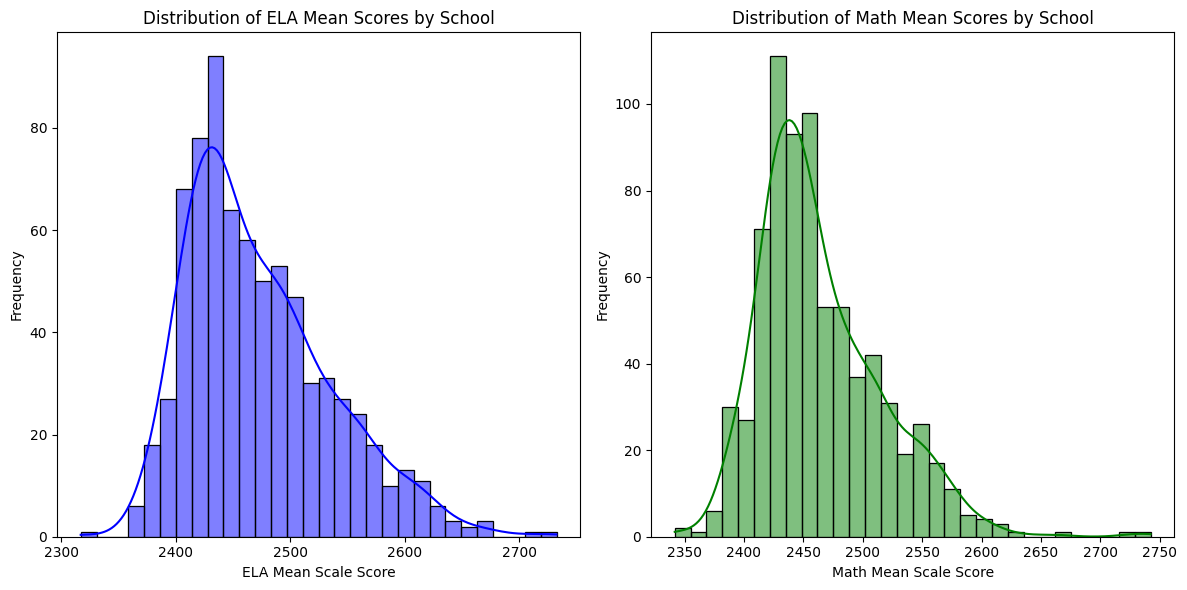

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of ELA scores
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(ela_school_scores['ELA Mean Scale Score'], bins=30, kde=True, color='blue')
plt.title('Distribution of ELA Mean Scores by School')
plt.xlabel('ELA Mean Scale Score')
plt.ylabel('Frequency')

# Plot the distribution of Math scores
plt.subplot(1, 2, 2)
sns.histplot(math_school_scores['Math Mean Scale Score'], bins=30, kde=True, color='green')
plt.title('Distribution of Math Mean Scores by School')
plt.xlabel('Math Mean Scale Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# EDA: Patterns b/w Best/Worst Performing Schools
## Trying to look at which are best/worst performing schools overall

In [18]:
# Group by 'School Name' and calculate the mean scale score
if 'School Name' in df.columns and 'Mean Scale Score' in df.columns:
    # Ensure 'Mean Scale Score' is numeric
    df['Mean Scale Score'] = pd.to_numeric(df['Mean Scale Score'], errors='coerce')

    # Filter for high schools
    high_schools = df[df['School Name'].str.contains('High', case=False, na=False)]
    high_school_performance = high_schools.groupby('School Name')['Mean Scale Score'].mean().reset_index()
    high_school_performance = high_school_performance.sort_values(by='Mean Scale Score', ascending=False)

    print("Top 15 Best-Performing High Schools:")
    display(high_school_performance.head(10))
    print("\nTop 15 Worst-Performing High Schools:")
    display(high_school_performance.tail(10))

    # Filter for middle schools
    middle_schools = df[df['School Name'].str.contains('Middle', case=False, na=False)]
    middle_schools = middle_schools[~middle_schools['School Name'].str.contains('High', case=False, na=False)]
    middle_school_performance = middle_schools.groupby('School Name')['Mean Scale Score'].mean().reset_index()
    middle_school_performance = middle_school_performance.sort_values(by='Mean Scale Score', ascending=False)

    print("\nTop 15 Best-Performing Middle Schools:")
    display(middle_school_performance.head(10))
    print("\nTop 15 Worst-Performing Middle Schools:")
    display(middle_school_performance.tail(10))

    # Filter for elementary schools
    elementary_schools = df[df['School Name'].str.contains('Elementary', case=False, na=False)]
    elementary_school_performance = elementary_schools.groupby('School Name')['Mean Scale Score'].mean().reset_index()
    elementary_school_performance = elementary_school_performance.sort_values(by='Mean Scale Score', ascending=False)

    print("\nTop 15 Best-Performing Elementary Schools:")
    display(elementary_school_performance.head(10))
    print("\nTop 15 Worst-Performing Elementary Schools:")
    display(elementary_school_performance.tail(10))

else:
    print("'School Name' or 'Mean Scale Score' column not found in the dataset.")

Top 15 Best-Performing High Schools:


,School Name,Mean Scale Score
15,Downtown Business High,2668.487037
47,Middle College High,2650.9975
22,Francisco Bravo Medical Magnet High,2644.075862
49,North Hollywood Senior High,2621.886486
35,John Marshall Senior High,2609.827027
38,King/Drew Medical Magnet High,2607.096429
0,Abraham Lincoln Senior High,2606.839655
26,Grover Cleveland Charter High,2605.734615
1,Academy of Medical Arts at Carson High,2595.068
61,Taft Charter High,2594.344595



Top 15 Worst-Performing High Schools:


,School Name,Mean Scale Score
7,Belmont Senior High,2472.202273
59,Susan Miller Dorsey Senior High,2469.843103
25,George Washington Preparatory High,2467.890741
19,Ellington (Duke) High (Continuation),2456.471429
28,Highland Park Continuation,2443.111538
14,Dan M. Issacs Avalon High,2434.695833
9,Cal Burke High,2433.161765
12,Central High,2405.707692
23,Frida Kahlo High,2397.514706
71,William Tell Aggeler Opportunity High,2379.391667



Top 15 Best-Performing Middle Schools:


,School Name,Mean Scale Score
1,Alfred B. Nobel Charter Middle,2605.56722
52,Robert Frost Middle,2587.937615
54,Rudecinda Sepulveda Dodson Middle,2587.930172
47,Paul Revere Charter Middle,2584.117593
17,Gaspar De Portola Charter Middle,2576.993043
43,Oliver Wendell Holmes Middle,2566.045078
28,John Burroughs Middle,2558.27521
45,Palms Middle,2558.143668
69,"Washington Irving Middle School Math, Music an...",2557.744385
62,Thomas Starr King Middle School Film and Media...,2556.985944



Top 15 Worst-Performing Middle Schools:


,School Name,Mean Scale Score
8,Charles Drew Middle,2443.338793
7,Canoga Park Middle,2443.298817
19,George Washington Carver Middle,2443.087805
9,Charles Maclay Middle,2441.324265
29,John H. Liechty Middle,2436.055556
31,"Johnnie Cochran, Jr., Middle",2433.385443
12,Edwin Markham Middle,2428.515951
30,John Muir Middle,2426.37378
56,Samuel Gompers Middle,2420.043529
6,Bret Harte Preparatory Middle,2414.224691



Top 15 Best-Performing Elementary Schools:


,School Name,Mean Scale Score
412,Wonderland Avenue Elementary,2584.604839
365,Third Street Elementary,2575.136486
23,Balboa Gifted/High Ability Magnet Elementary,2574.01625
82,Clover Avenue Elementary,2562.453226
313,Roscomare Road Elementary,2561.731
43,Broadway Elementary,2560.443939
285,Overland Avenue Elementary,2560.322115
396,Welby Way Charter Elementary School And Gifted...,2552.4175
121,Fairburn Avenue Elementary,2549.52931
60,Canyon Charter Elementary,2549.492857



Top 15 Worst-Performing Elementary Schools:


,School Name,Mean Scale Score
391,Wadsworth Avenue Elementary,2384.48209
175,Hillcrest Drive Elementary,2384.255556
279,One Hundred Seventh Street Elementary,2382.986275
136,Forty-Second Street Elementary,2379.42766
250,Miramonte Elementary,2376.374648
180,Holmes Avenue Elementary,2375.658511
133,Florence Griffith Joyner Elementary,2373.477857
223,Lovelia P. Flournoy Elementary,2372.662319
231,Manhattan Place Elementary,2370.616304
51,CDS Elementary,<NA>


# Highest/Lowest Performing Schools (Visualization)

High Schools:


/tmp/ipython-input-3282698442.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_15, x='Mean Scale Score', y='School Name', palette='viridis')


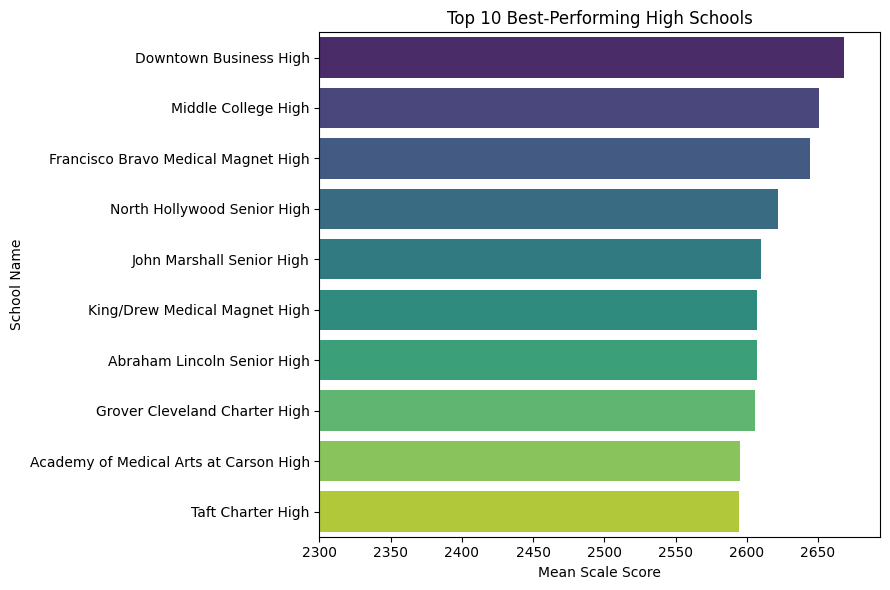

/tmp/ipython-input-3282698442.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=worst_15, x='Mean Scale Score', y='School Name', palette='magma')


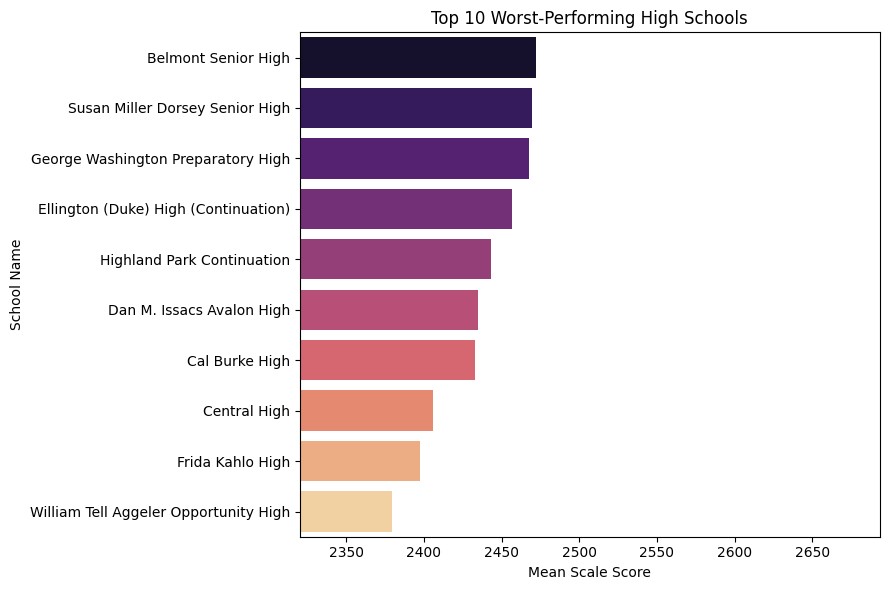

Middle Schools:


/tmp/ipython-input-3282698442.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_15, x='Mean Scale Score', y='School Name', palette='viridis')


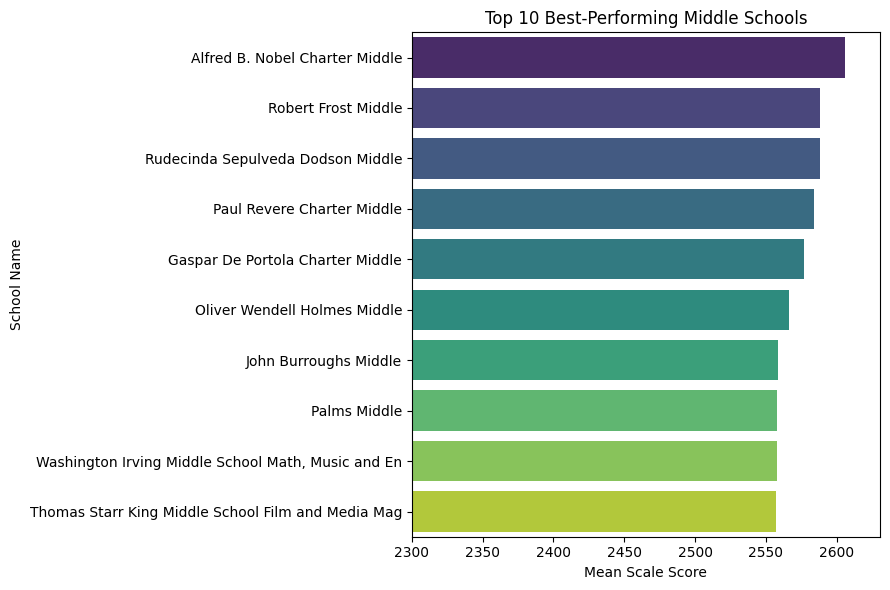

/tmp/ipython-input-3282698442.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=worst_15, x='Mean Scale Score', y='School Name', palette='magma')


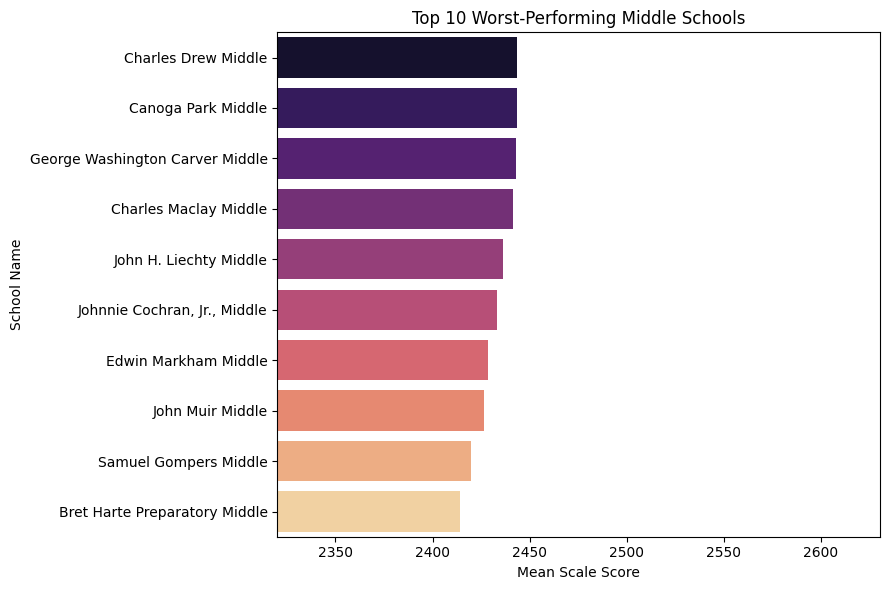

Elementary Schools:


/tmp/ipython-input-3282698442.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_15, x='Mean Scale Score', y='School Name', palette='viridis')


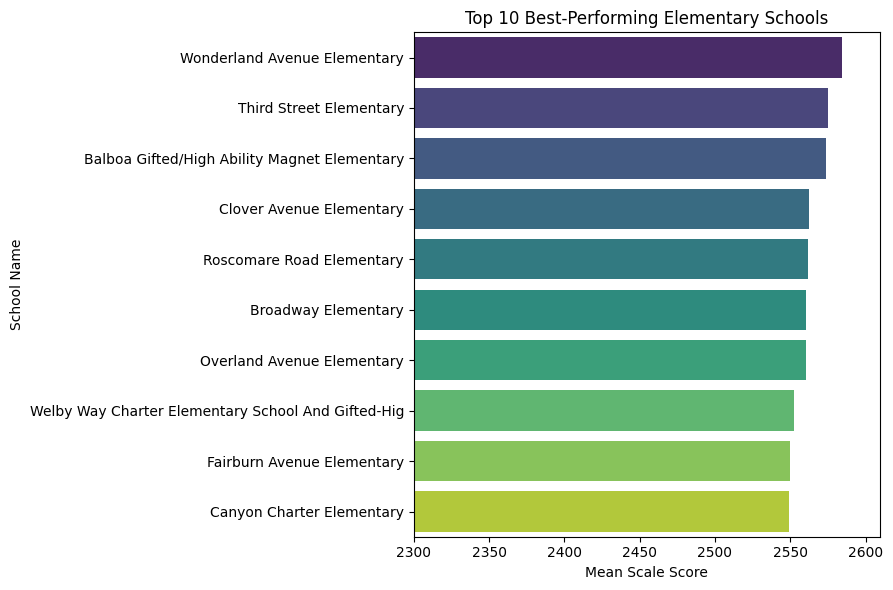

/tmp/ipython-input-3282698442.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=worst_15, x='Mean Scale Score', y='School Name', palette='magma')


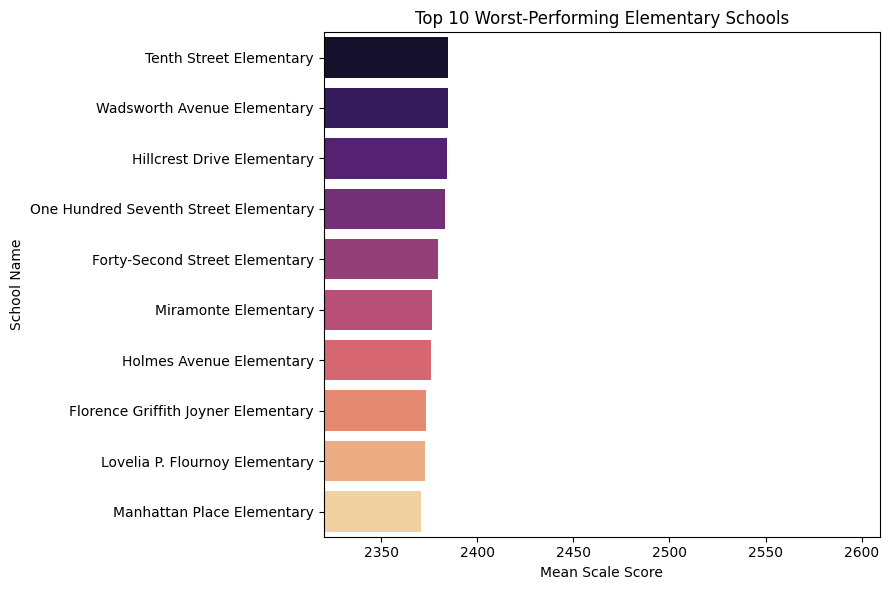

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'Mean Scale Score' is numeric
df['Mean Scale Score'] = pd.to_numeric(df['Mean Scale Score'], errors='coerce')

# Drop rows with missing 'Mean Scale Score'
df = df.dropna(subset=['Mean Scale Score'])

# Function to visualize top and worst schools for a given school level
def visualize_school_performance(school_data, school_level):
    # Top 15 best-performing schools
    top_15 = school_data.head(10)
    # Bottom 15 worst-performing schools
    worst_15 = school_data.tail(10)
    max_x = top_15['Mean Scale Score'].max()
    # Plot for top 15 schools
    plt.figure(figsize=(9, 6))
    sns.barplot(data=top_15, x='Mean Scale Score', y='School Name', palette='viridis')
    plt.title(f'Top 10 Best-Performing {school_level} Schools')
    plt.xlabel('Mean Scale Score')
    plt.ylabel('School Name')
    plt.xlim(2300, top_15['Mean Scale Score'].max() + 25)  # Adjust x-axis limits
    plt.tight_layout()
    plt.show()

    # Plot for worst 15 schools
    plt.figure(figsize=(9, 6))
    sns.barplot(data=worst_15, x='Mean Scale Score', y='School Name', palette='magma')
    plt.title(f'Top 10 Worst-Performing {school_level} Schools')
    plt.xlabel('Mean Scale Score')
    plt.ylabel('School Name')
    plt.xlim(2320, max_x+ 25)  # Adjust x-axis limits
    plt.tight_layout()
    plt.show()

# Filter for High Schools
high_schools = df[df['School Name'].str.contains('High', case=False, na=False)]
high_school_performance = high_schools.groupby('School Name')['Mean Scale Score'].mean().reset_index()
high_school_performance = high_school_performance.sort_values(by='Mean Scale Score', ascending=False)

print("High Schools:")
visualize_school_performance(high_school_performance, "High")

# Filter for Middle Schools
middle_schools = df[df['School Name'].str.contains('Middle', case=False, na=False)]
middle_schools = middle_schools[~middle_schools['School Name'].str.contains('High', case=False, na=False)]
middle_schools = middle_schools[~middle_schools['School Name'].str.contains('Elementary', case=False, na=False)]


middle_school_performance = middle_schools.groupby('School Name')['Mean Scale Score'].mean().reset_index()
middle_school_performance = middle_school_performance.sort_values(by='Mean Scale Score', ascending=False)

print("Middle Schools:")
visualize_school_performance(middle_school_performance, "Middle")

# Filter for Elementary Schools
elementary_schools = df[df['School Name'].str.contains('Elementary', case=False, na=False)]
elementary_school_performance = elementary_schools.groupby('School Name')['Mean Scale Score'].mean().reset_index()
elementary_school_performance = elementary_school_performance.sort_values(by='Mean Scale Score', ascending=False)

print("Elementary Schools:")
visualize_school_performance(elementary_school_performance, "Elementary")